In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import math
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
def read_data(city_name):
    trip_data = pd.read_csv("Project_Data/Combined_Data/"+city_name+".csv", encoding = "ISO-8859-1")
    trip_data["trip_duration"] = pd.to_timedelta(trip_data["trip_duration"])
    trip_data["datetime_start"] = pd.to_datetime(trip_data["datetime_start"])
    trip_data["datetime_end"] = pd.to_datetime(trip_data["datetime_end"])
    trip_data["day"] = pd.to_datetime(trip_data["day"])
    return trip_data

In [110]:
Duesseldorf_set = read_data("duesseldorf")
Bremen_set = read_data("bremen")
                       
Duesseldorf_set.head(10)

,Unnamed: 0,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,...,distance,trip_duration_hours,avg_speed,rounded_time_hourly,temp,wind,rain,fleetsize_weekly,fleetsize_monthly,fleetsize_dayly
0,0,2019-02-06,15:35:00,538,duesseldorf,00:17:00,51.218927,6.765862,51.240644,6.781982,...,2.662958,0.283333,9.398675,2019-02-06 16:00:00,9.5,5.0,0.0,51,131,15
1,1,2019-02-19,15:57:00,538,duesseldorf,00:23:00,51.213766,6.751624,51.223056,6.779230,...,2.182598,0.383333,5.693734,2019-02-19 16:00:00,10.3,5.6,0.0,69,131,16
2,2,2019-03-22,13:20:00,538,duesseldorf,01:20:00,51.229671,6.797855,51.218527,6.794867,...,1.256486,1.333333,0.942365,2019-03-22 13:00:00,19.0,3.5,0.0,120,235,38
3,3,2019-03-27,06:34:00,538,duesseldorf,00:22:00,51.218527,6.794867,51.252515,6.782041,...,3.883302,0.366667,10.590823,2019-03-27 07:00:00,4.8,0.5,0.0,164,235,34
4,4,2019-03-28,14:54:00,538,duesseldorf,00:12:00,51.252515,6.782041,51.242592,6.782100,...,1.103349,0.200000,5.516746,2019-03-28 15:00:00,12.5,1.7,0.0,164,235,36
5,5,2019-03-29,15:31:00,538,duesseldorf,00:09:00,51.242592,6.782100,51.231421,6.787410,...,1.296010,0.150000,8.640064,2019-03-29 16:00:00,18.2,2.7,0.0,164,235,66
6,6,2019-04-09,15:24:00,538,duesseldorf,00:15:00,51.238045,6.778350,51.252515,6.782041,...,1.629359,0.250000,6.517437,2019-04-09 15:00:00,15.3,7.6,0.0,173,271,70
7,7,2019-04-09,16:05:00,538,duesseldorf,00:23:00,51.252515,6.782041,51.256262,6.739554,...,2.985949,0.383333,7.789433,2019-04-09 16:00:00,14.5,6.9,0.0,173,271,70
8,8,2019-05-02,08:48:00,538,duesseldorf,00:18:00,51.209559,6.793596,51.212284,6.793673,...,0.303148,0.300000,1.010493,2019-05-02 09:00:00,10.0,3.1,0.0,188,337,69
9,9,2019-05-04,11:08:00,538,duesseldorf,00:09:00,51.212284,6.793673,51.218527,6.794867,...,0.699141,0.150000,4.660943,2019-05-04 11:00:00,8.4,3.0,0.0,188,337,38


## Spielen:

In [161]:
def temp_cluster(yLabel):
    plt.figure(figsize = (20,12))
    s1 = plt.scatter(Duesseldorf_set['temp'][Duesseldorf_set['temp'] > 5], Duesseldorf_set[yLabel][Duesseldorf_set['temp'] > 5], marker='x', color='red')
    s2 = plt.scatter(Duesseldorf_set['temp'][Duesseldorf_set['temp'] <= 5], Duesseldorf_set[yLabel][Duesseldorf_set['temp'] <= 5], marker='x', color='blue')
    
    if(yLabel == 'trip_duration_hours'):   
        lineheight = 0.5
    elif(yLabel == 'distance'):
        lineheight = 5

    y = np.zeros(1000)
    x = np.linspace(-2, 37, 1000, endpoint=True)
    
    plt.plot(x, y + lineheight, 'g')
    
    plt.xlabel("Temperature")
    plt.ylabel(yLabel)
    


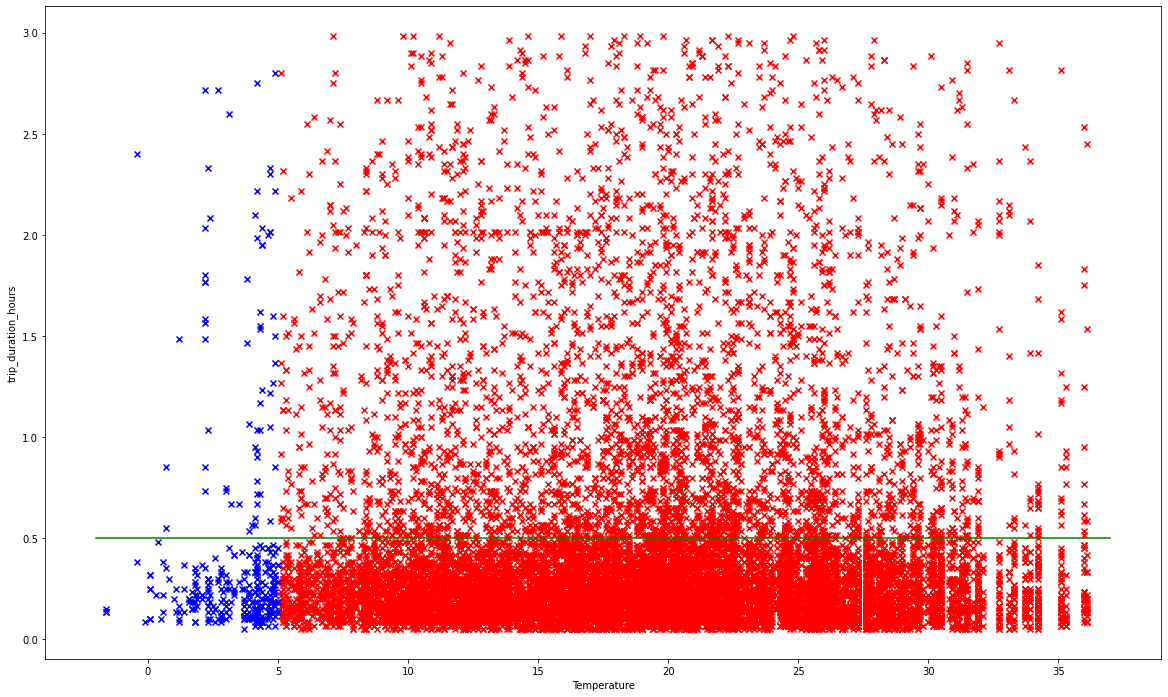

In [164]:
temp_cluster('trip_duration_hours')

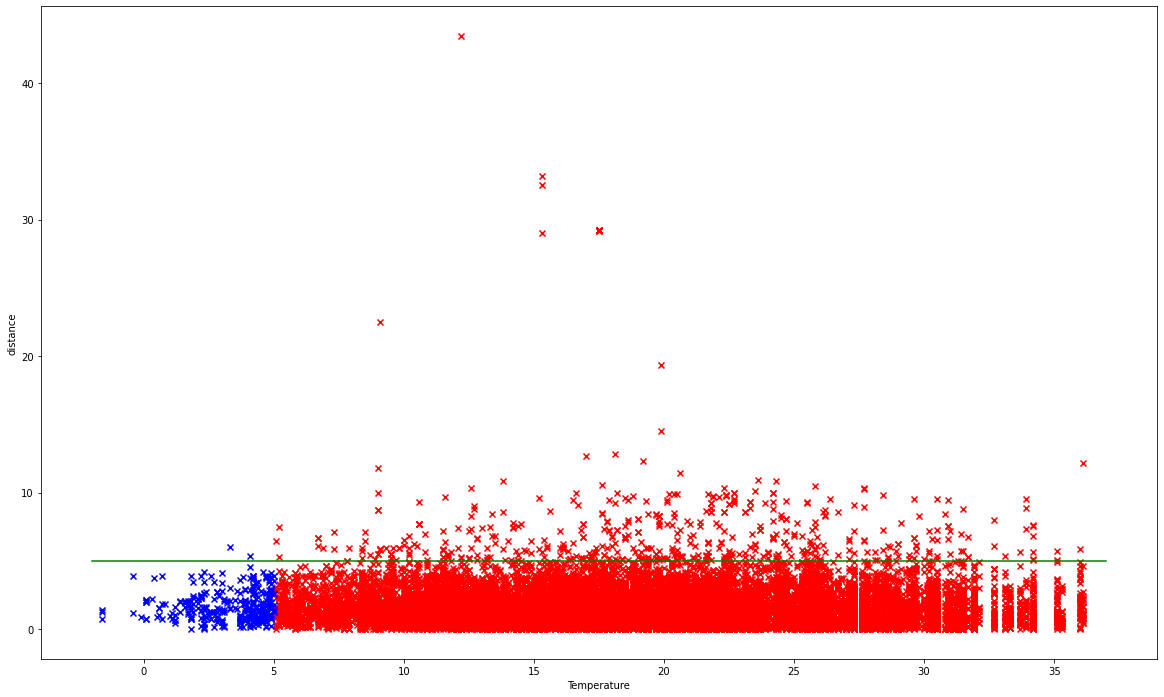

In [165]:
temp_cluster('distance')

In [173]:
def weekday_cluster(yLabel):
    plt.figure(figsize = (20,12))
    s1 = plt.scatter(Duesseldorf_set['weekday'][Duesseldorf_set['weekday'] > 4], Duesseldorf_set[yLabel][Duesseldorf_set['weekday'] > 4], marker='x', color='red')
    s2 = plt.scatter(Duesseldorf_set['weekday'][Duesseldorf_set['weekday'] <= 4], Duesseldorf_set[yLabel][Duesseldorf_set['weekday'] <= 4], marker='x', color='blue')
    
    if(yLabel == 'trip_duration_hours'):   
        lineheight = 0.5
    elif(yLabel == 'distance'):
        lineheight = 5

    y = np.zeros(1000)
    x = np.linspace(0, 6, 1000, endpoint=True)
    
    plt.plot(x, y + lineheight, 'g')
    
    plt.xlabel("Wochentag")
    plt.ylabel(yLabel)
    


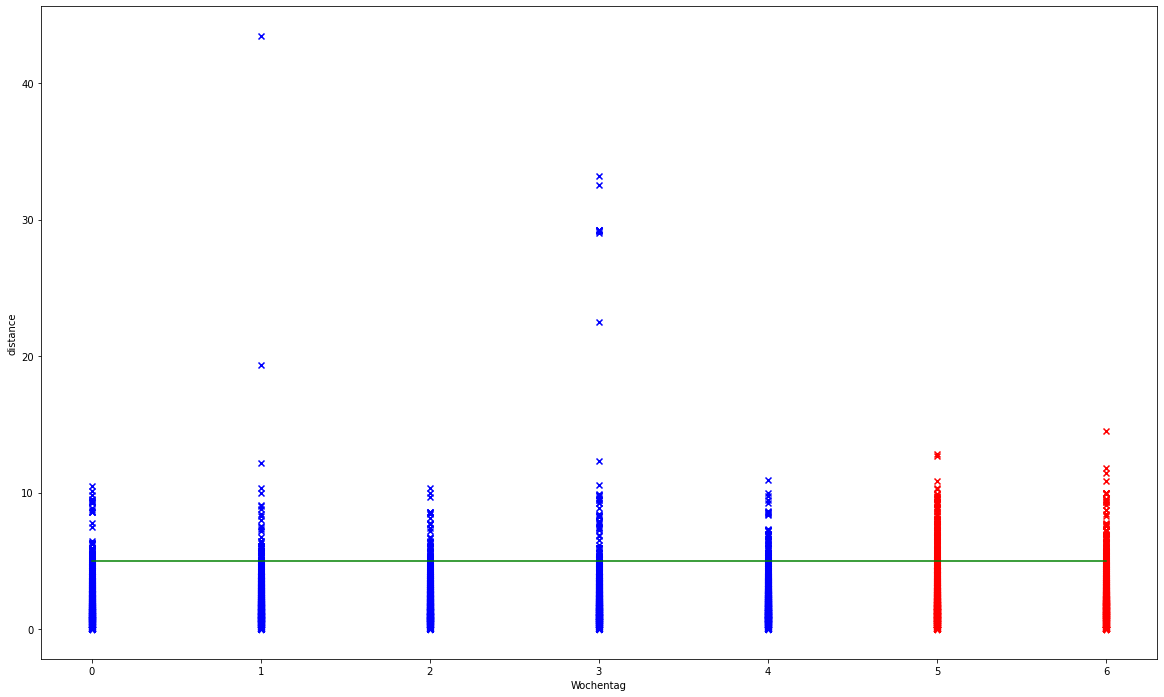

In [175]:
weekday_cluster('distance')